In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations

How to improve the data
* good column names from the start
* no unnecessary whitespace
* sensible group names

# Diagnostic plots

In [2]:
log = pd.read_csv('log_5_6_20180715_11_42_58.csv', sep=',')

### Accept + move type statistics

In [3]:
log['accept'].value_counts()

0.0    4349915
1.0     458318
Name: accept, dtype: int64

In [4]:
log['type'].value_counts()

B    1667165
D    1666641
M    1666194
Name: type, dtype: int64

In [6]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     M       1527426
        D       1493543
        B       1328946
1.0     B        173245
        D        173098
        M        111975
Name: type, dtype: int64

### Convergence

In [7]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [89]:
block_length = 20000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)
groupby_blocks = np.array([0] + list(groupby_blocks+1))[0:-1]

In [90]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

In [91]:
groupedmeanlog = log.groupby([groupby_blocks])['energy','no_act_vrt','time'].mean().reset_index()

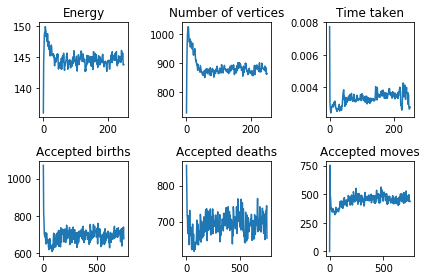

In [92]:

plt.subplot(2,3,1)
plt.title('Energy')
groupedmeanlog['energy'].plot()

plt.subplot(2,3,2)
plt.title('Number of vertices')
groupedmeanlog['no_act_vrt'].plot()

plt.subplot(2,3,3)
plt.title('Time taken')
groupedmeanlog['time'].plot()

plt.subplot(2,3,4)
plt.title('Accepted births')
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(2,3,5)
plt.title('Accepted deaths')
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(2,3,6)
plt.title('Accepted moves')
groupedlog[groupedlog['type'] == 'M']['accept'].plot()


plt.tight_layout()
# plt.show()

plt.savefig('foo.pdf')

In [135]:
log['energy'] - log['energy_after']

0          137.089
1          137.089
2          137.089
3          137.089
4          137.089
5            0.177
6          136.912
7          136.912
8          136.912
9          136.912
10         136.912
11         136.912
12         136.912
13         136.912
14         136.912
15         136.912
16         136.912
17         136.912
18         136.912
19         136.912
20         136.912
21         136.912
22          -0.066
23         136.978
24         136.978
25         136.978
26          -0.028
27         137.006
28         137.006
29         137.006
            ...   
4999970    146.162
4999971    146.162
4999972    146.162
4999973    146.162
4999974    146.162
4999975    146.162
4999976      0.053
4999977    146.109
4999978      0.085
4999979    146.024
4999980      0.034
4999981    145.990
4999982    145.990
4999983    145.990
4999984    145.990
4999985    145.990
4999986    145.990
4999987    145.990
4999988    145.990
4999989     -0.099
4999990    146.089
4999991    1

### Checking if the energy does not move by itself

In [172]:
lognona = log[~log.isnull().any(axis=1)]
logshift = lognona.assign(shiftenergy = lognona['energy'].shift(-1))

In [173]:
logshift[(logshift['shiftenergy'] - logshift['energy'] != 0) & (logshift['accept'] != 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time,shiftenergy
4999999,5000000,D,0.475777 0.281698 0.525655 0.000836042,,145.128,-1.0,0.842219,1.87468,0.0,6147.0,876.0,0.001967,NaN


# Cell data distributions

In [129]:
cell_data = pd.read_csv('cell_data_0_0_20180716_11_25_19.txt', sep=';')

In [130]:
cell_data

,epsilon,alpha,theta,z,max_weight,tetra_volume,tetra_circum,face_surf,edge_length,point_weight,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.01,0.1,1,500,0.01,"[4.29547e-05, 0.000271353, 0.000265602, 0.0001...","[0.0617318, 0.0966743, 0.0920054, 0.0874397, 0...","[0.00476713, 0.00452614, 0.00401268, 0.0094028...","[0.111111, 0.168736, 0.153063, 0.138679, 0.122...","[1.96635e-07, 0.00127387, 0.000519076, 0.00099...","[14, 12, 14, 17, 12, 11, 12, 16, 21, 12, 17, 1...",5403,873,147,0.016985,0.000337,0.099995,0.740814,156.35,11.5594


In [125]:
strlist = cell_data.tetra_circum[0][1:-2].replace(' ','').split(',')
[float(entry) for entry in strlist]

ValueError: could not convert string to float: 